1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
#Оценим данные визуально
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
df = pd.DataFrame({'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


[]

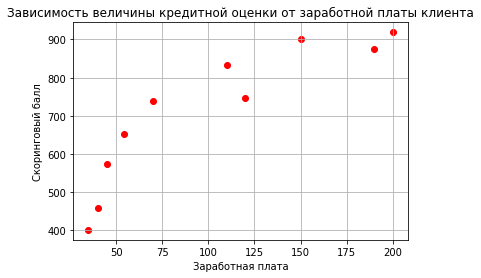

In [133]:
plt.scatter(df.zp, df.ks, marker='o', color='red')
plt.grid()
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.title('Зависимость величины кредитной оценки от заработной платы клиента')
plt.plot()

Глядя на граффик можно предположить, что значение кредитного скоринга зависит от величины заработной платы логарифмически, т.е.

$$y = \beta_0 + \beta_1\log_{\beta_2}x, \beta_3 > 1,$$  

По условию задачи нам необходимо определить коэффициенты линейной регрессии, так что мы предполагаем что зависимость скоринговой оценки от заработной платы линейна, т.е.

$$y = \beta_0 + \beta_{1}x, $$

в случае, если $f(0) = 0,$ т.е. при расчете без итресепта:

$$y = \beta_{0}x.$$

$$\beta_0 = \frac{\sum\limits_{i=1}^{n}x_{i}y_{i}}{\sum\limits_{i=1}^{n}x_{i}^2}$$

В случае с интерсептом $\beta_1$:

$$\beta_1 = \frac{n\sum\limits_{i=1}^{n}x_{i}y_{i} - \sum\limits_{i=1}^{n}x_{i}\sum\limits_{i=1}^{n}y_{i}}{n\sum\limits_{i=1}^{n}x_{i}^2 - (\sum\limits_{i=1}^{n}x_{i})^2}$$

In [107]:
b0 = np.mean(df.zp * df.ks)/np.mean(df.zp**2) #Для случая без интерсепта
b0

5.889820420132688

In [50]:
#Случай с интерсептом
def calculate_b_f1(x, y):
    n = len(x)
    return (n*np.sum(x * y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - (np.sum(x))**2)

Или $$\beta_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}$$

In [51]:
#Случай с интерсептом (другая формула)
def calculate_b_f2(x, y):
    n = len(x)
    return (np.mean(x * y) - np.mean(x) * np.mean(y))/(np.mean(x**2) - np.mean(x)**2)

In [52]:
#Здесь коэффиценты b1 и b2 - один и тот же коэффициент для случая с интерсептом, вычисленный для проверки разными формулами
b1 = round(calculate_b_f1(df.zp, df.ks), 5)
b2 = round(calculate_b_f2(df.zp, df.ks), 5)
print(b1, b2, b1==b2)

2.62054 2.62054 True


Коэффициент $\beta_0 = 5.88982$ для случая без интерсепта  
Коэффициент $\beta_1 = 2.62054$ для случая с интерсептом

Тогда коэффициент  $\beta_0 = \overline{y} - \beta_1\overline{x}$  для случая с интерсептом:

In [53]:
a = np.mean(df.ks) - b1*np.mean(df.zp)
print(round(a, 5))

444.17724


Значения коэффициента линейной регрессии для случая без интерсепта:  
$\beta_0 = 5.89$  
Значения коэффициентов линейной регрессии для случая с интерсептом:  
$\beta_0 = 444.18$  
$\beta_1 = 2.62$  

Уравнение линейной регрессии для случая без интерсепта:
$$\hat{y} = \beta_{0}x$$
$$\hat{y} = 5.89x$$  

Уравнение линейной регрессии для случая с интерсептом:
$$\hat{y} = \beta_0 + \beta_{1}x$$
$$\hat{y} = 444.18 + 2.62x$$  


Проверим полученные значения с помощью матричных вычислений:
$$\hat{B} = (X^T \cdot X)^{-1}\cdot X^T\cdot Y$$

In [85]:
X1 = np.array(df.zp).reshape(len(df), 1) #для случая без интерсепта
X2 = np.hstack([np.ones((len(df), 1)), X1]) #для случая с интерсептом
Y = np.array(df.ks).reshape(len(df), 1)

In [106]:
B = np.linalg.inv(X1.T@X1)@X1.T@Y
B
#значения коэффициента для случая без интерсепта корректно

array([[5.88982042]])

In [97]:
B = np.linalg.inv(X2.T@X2)@X2.T@Y
B
#значения коэффициентов для случая c интерсептом корректны

array([[444.17735732],
       [  2.62053888]])

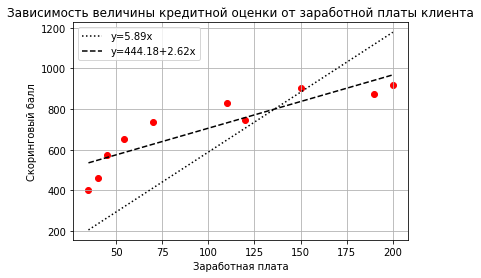

In [132]:
#Построим графики получившичся уравнений линейной регрессии

x = df.zp
y = df.ks
a
x1 = [np.min(df.zp), np.max(df.zp)]
y1 = [i*b0 for i in x1]
y2 = [a + j * b1 for j in x1]

plt.scatter(df.zp, df.ks, marker='o', color='red')
plt.grid()

plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.title('Зависимость величины кредитной оценки от заработной платы клиента')
plt.plot(x1, y1, color='black', linestyle='dotted', label='y=5.89x')
plt.plot(x1, y2, color='black', linestyle='dashed', label='y=444.18+2.62x')
plt.legend()
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Корректность найденного коэффициента определяется из условия минимизации квадратичной ошибки, которая вычисляется по формуле:
$$mse = \frac{\sum\limits_{i=1}^{n}(\hat y_{i} - y_{i})^2}{n}$$

In [147]:
x = df.zp
y = df.ks
n = len(df)

In [149]:
def calculate_min_square_error(b1, y=y, x=x, n=n):
    return np.sum((x*b1-y)**2)/n

In [279]:
def calculate_b_gradient_method(alpha_0, b1_0, n_iter):
    b1 = b1_0
    alpha = alpha_0
    for i in range(n_iter):
        b1 -= alpha*(2/n)*np.sum((b1*x-y)*x)
        m_sq_e = calculate_min_square_error(b1)
        if i%(n_iter/10) == 0:
            print('Iteration №{}, b1={:.5f}, mse={:.2f}'.format(i, b1, m_sq_e))
        
        #Код ниже останавливает подбор, если mse начинает расти
        #и печатает значения параметров для итерации на которой началось возрастание, и предыдущей
        #Эта проверка замедляет расчет, но т.к. из условий задачи дан небольшой объем данных, то все работает корректно
        if calculate_min_square_error(b1) > calculate_min_square_error(b1_0):
            print('-'*50)
            print('Средняя квадратичная ошибка увеличивается')
            print('Iteration №{}, b1={:.5f}, mse={:.2f}'.format(i-1, b1_0, calculate_min_square_error(b1_0)))
            print('Iteration №{}, b1={:.5f}, mse={:.2f}'.format(i, b1, m_sq_e))
            print('-'*50)
            print('mse(n-1)={:.12f}'.format(calculate_min_square_error(b1_0)))
            print('  mse(n)={:.12f}'.format(calculate_min_square_error(b1)))
            print('Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность')
            break
        else: b1_0 = b1

In [280]:
#Примем начальные значения для скорости обучения alpha и коэффициента линейной регрессии b1  
alpha_0 = 1e-4
b1_0 = 0
n_iter = 100

In [281]:
calculate_b_gradient_method(alpha_0, b1_0, n_iter)

Iteration №0, b1=16.22834, mse=1529028.57
--------------------------------------------------
Средняя квадратичная ошибка увеличивается
Iteration №-1, b1=0.00000, mse=534426.90
Iteration №0, b1=16.22834, mse=1529028.57
--------------------------------------------------
mse(n-1)=534426.900000000023
  mse(n)=1529028.571743039880
Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность


In [282]:
#Cкорость обучения слишком большая, изменим начальные параметры
alpha_0 = 1e-6
b1_0 = 0
n_iter = 1000
calculate_b_gradient_method(alpha_0, b1_0, n_iter)

Iteration №0, b1=0.16228, mse=508453.82
Iteration №100, b1=5.53943, mse=58208.27
Iteration №200, b1=5.86838, mse=56523.19
Iteration №300, b1=5.88851, mse=56516.88
Iteration №400, b1=5.88974, mse=56516.86
Iteration №500, b1=5.88982, mse=56516.86
Iteration №600, b1=5.88982, mse=56516.86
--------------------------------------------------
Средняя квадратичная ошибка увеличивается
Iteration №644, b1=5.88982, mse=56516.86
Iteration №645, b1=5.88982, mse=56516.86
--------------------------------------------------
mse(n-1)=56516.858415719507
  mse(n)=56516.858415719515
Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность


#### Значение коэффициента линейной регрессии для случая без интерсепта, определенное с помощью метода градиентного спуска совпало с ранее полученным занчением:  
$\beta_0 = 5.89$  

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

В общем случае для нахождения границ доверительного интервала следует использовать формулу:  
$$ \overline{X} \pm K_r\frac{\sigma}{\sqrt{n}}$$

При этом, если нам не известна величина $\sigma_{г.с.}$ или $D = \sigma_{г.с.}^2$ - т.е. не известна оценка стандартного отклонения для генеральной совокупности, но имеются данные анализируемой величины по выборке, то для расчета следует определить несмещенную оценку стандартного отклонения по данным из выборки, а в качестве $K_r$ использовать t-критерий Стьюдента.
При этом критерий следует принимать для величин $\alpha/2$ (для оценки двустороннего доверительного интервала) и колличества степеней свободы n-1, где n - размер выборки:

$$ \overline{X} \pm t_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

Если же величины $\sigma_{г.с.}$ или $D = \sigma_{г.с.}^2$ известны, то в расчет принимаются известные по условию задачи величины, а критерий $K_r$ определяется по таблице значений функции Лапласа, тогда формула для определения границ доверительного интервала будет иметь вид:  

$$ \overline{X} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

Аналогичным образом при проверке статистистических гипотез, для нахождения значения критерия с заранее установленным уровнем значимости ($\alpha = 0.01, 0.05, 0.1$) следует принимать $t_{\alpha/2}$ (для оценки с 2х сторон) или $t_{\alpha}$ (при односторонней оценке), если не известны величины $\sigma_{г.с.}$ или $D = \sigma_{г.с.}^2$. Если же эти величины известны, то в качестве критерия следует принять величину $z_{\alpha/2}$ или $z_{\alpha}$ (для оценки с двух или с одной стороны соответственно).  

*4. Произвести вычисления как в пункте 2, но с вычислением intercept.  
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно  
(то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [285]:
#Внесем интерсепт в расчет mse
def calculate_min_square_error_intercept(b0, b1, y=y, x=x, n=n):
    return np.sum((b0 + x*b1-y)**2)/n

In [334]:
#Изменим функцию подбора коэффициентов линейной регрессии градиентным спуском
#для случая с интерсептом

def calculate_b_gradient_method_intercept(alpha_0, b0_0, b1_0, n_iter):
    b0 = b0_0
    b1 = b1_0
    alpha = alpha_0
    for i in range(n_iter):
        #добавим значение интерсепта в расчет приращения коэффициентов
        #учитываем при этом, что величины b1 при расчете b0 и b0 при расчете b1 должны браться из предыдущей итерации
        b0 -= alpha*(2/n)*np.sum((b0 + b1_0*x)-y) 
        b1 -= alpha*(2/n)*np.sum(((b0_0 + b1*x)-y)*x) #учитываем при этом, что величины
        m_sq_e = calculate_min_square_error_intercept(b0, b1)
        if i%(n_iter/10) == 0:
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i, b0, b1, m_sq_e))
        
        #Код ниже останавливает подбор, если mse начинает расти
        #и печатает значения параметров для итерации на которой началось возрастание, и предыдущей
        #Эта проверка замедляет расчет, но т.к. из условий задачи дан небольшой объем данных, то все работает корректно
        if calculate_min_square_error_intercept(b0, b1) > calculate_min_square_error_intercept(b0_0, b1_0):
            print('-'*50)
            print('Средняя квадратичная ошибка увеличивается')
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i-1, b0_0, b1_0, calculate_min_square_error_intercept(b0_0, b1_0)))
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i, b0, b1, m_sq_e))
            print('-'*50)
            print('mse(n-1)={:.12f}'.format(calculate_min_square_error_intercept(b0_0, b1_0)))
            print('  mse(n)={:.12f}'.format(calculate_min_square_error_intercept(b0, b1)))
            print('Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность')
            break
        else: 
            b0_0 = b0 #Сохраняем значения из предыдущей итерации для независимого изменения переменных
            b1_0 = b1

In [335]:
alpha_0 = 1e-4
b0_0 = 0
b1_0 = 0
n_iter = 1000
calculate_b_gradient_method_intercept(alpha_0, b0_0, b1_0, n_iter)

Iteration №0, b0=0.14198, b1=16.22834, mse=1529294.28
--------------------------------------------------
Средняя квадратичная ошибка увеличивается
Iteration №-1, b0=0.00000, b1=0.00000, mse=534426.90
Iteration №0, b0=0.14198, b1=16.22834, mse=1529294.28
--------------------------------------------------
mse(n-1)=534426.900000000023
  mse(n)=1529294.280119196977
Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность


In [336]:
#Изменим скорость обучения и колличество итераций
alpha_0 = 1e-5
b0_0 = 0
b1_0 = 0
n_iter = 1000
calculate_b_gradient_method_intercept(alpha_0, b0_0, b1_0, n_iter)

Iteration №0, b0=0.01420, b1=1.62283, mse=307334.31
Iteration №100, b0=0.27086, b1=5.88789, mse=56455.84
Iteration №200, b0=0.49599, b1=5.88623, mse=56405.15
Iteration №300, b0=0.72102, b1=5.88457, mse=56354.51
Iteration №400, b0=0.94593, b1=5.88292, mse=56303.93
Iteration №500, b0=1.17072, b1=5.88126, mse=56253.39
Iteration №600, b0=1.39541, b1=5.87961, mse=56202.91
Iteration №700, b0=1.61997, b1=5.87796, mse=56152.47
Iteration №800, b0=1.84443, b1=5.87630, mse=56102.09
Iteration №900, b0=2.06877, b1=5.87465, mse=56051.76


In [337]:
#Слишком медленная скорость обчучения и недостаточное колличество итераций,
#снова изменим параметры модели,
#используем при этом начальные значения коэффициентов, полученные предыдущей моделью
alpha_0 = 5e-5
b0_0 = 2.0688
b1_0 = 5.87464
n_iter = 1000
calculate_b_gradient_method_intercept(alpha_0, b0_0, b1_0, n_iter)

Iteration №0, b0=2.08001, b1=5.87458, mse=56049.24
Iteration №100, b0=3.19999, b1=5.86633, mse=55798.36
Iteration №200, b0=4.31713, b1=5.85810, mse=55548.74
Iteration №300, b0=5.43144, b1=5.84990, mse=55300.40
Iteration №400, b0=6.54293, b1=5.84172, mse=55053.30
Iteration №500, b0=7.65160, b1=5.83356, mse=54807.46
Iteration №600, b0=8.75747, b1=5.82542, mse=54562.87
Iteration №700, b0=9.86053, b1=5.81730, mse=54319.51
Iteration №800, b0=10.96080, b1=5.80920, mse=54077.38
Iteration №900, b0=12.05828, b1=5.80113, mse=53836.48


In [338]:
#Вероятно проблемы со скоростью нахождения коэффициентов вызваны разным порядком коэффициентов b1 и b0,
#Изменим модель так, чтобы скорость обучения для коэффициента b0 стала больше в 10 раз

def calculate_b_gradient_method_intercept_v2(alpha_0, b0_0, b1_0, n_iter):
    b0 = b0_0
    b1 = b1_0
    alpha = alpha_0
    for i in range(n_iter):
        b0 -= alpha*(2/n)*np.sum((b0 + b1_0*x)-y)*1000 #Скорость обучения для b0 увеличина здесь 
        b1 -= alpha*(2/n)*np.sum(((b0_0 + b1*x)-y)*x)
        m_sq_e = calculate_min_square_error_intercept(b0, b1)
        if i%(n_iter/10) == 0:
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i, b0, b1, m_sq_e))
        
        if calculate_min_square_error_intercept(b0, b1) > calculate_min_square_error_intercept(b0_0, b1_0):
            print('-'*50)
            print('Средняя квадратичная ошибка увеличивается')
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i-1, b0_0, b1_0, calculate_min_square_error_intercept(b0_0, b1_0)))
            print('Iteration №{}, b0={:.5f}, b1={:.5f}, mse={:.2f}'.format(i, b0, b1, m_sq_e))
            print('-'*50)
            print('mse(n-1)={:.12f}'.format(calculate_min_square_error_intercept(b0_0, b1_0)))
            print('  mse(n)={:.12f}'.format(calculate_min_square_error_intercept(b0, b1)))
            print('Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность')
            break
        else: 
            b0_0 = b0
            b1_0 = b1


In [339]:
#Используем те же значения параметров что и на прошлом шаге, но скорость обучения для параметра b0 увеличена в 1000 раз
#Так вообще можно?
alpha_0 = 5e-5
b0_0 = 2.0688
b1_0 = 5.87464
n_iter = 1000 #колличество итераций тоже увеличим
calculate_b_gradient_method_intercept_v2(alpha_0, b0_0, b1_0, n_iter)

Iteration №0, b0=13.28307, b1=5.87458, mse=53662.17
Iteration №100, b0=406.35775, b1=2.90385, mse=6833.57
Iteration №200, b0=440.85936, b1=2.64539, mse=6473.21
Iteration №300, b0=443.88626, b1=2.62272, mse=6470.44
Iteration №400, b0=444.15182, b1=2.62073, mse=6470.41
Iteration №500, b0=444.17512, b1=2.62056, mse=6470.41
Iteration №600, b0=444.17716, b1=2.62054, mse=6470.41
Iteration №700, b0=444.17734, b1=2.62054, mse=6470.41
--------------------------------------------------
Средняя квадратичная ошибка увеличивается
Iteration №705, b0=444.17734, b1=2.62054, mse=6470.41
Iteration №706, b0=444.17734, b1=2.62054, mse=6470.41
--------------------------------------------------
mse(n-1)=6470.414201176717
  mse(n)=6470.414201176720
Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность


In [340]:
#Cнова вернемся к модели с одинаковой скоростью обучения,
#Но примем начальные приближения полученные на предыдущем шаге
alpha_0 = 5e-5
b0_0 = 444.17734
b1_0 = 2.62054
n_iter = 1000 #колличество итераций тоже увеличим
calculate_b_gradient_method_intercept(alpha_0, b0_0, b1_0, n_iter)

Iteration №0, b0=444.17734, b1=2.62054, mse=6470.41
--------------------------------------------------
Средняя квадратичная ошибка увеличивается
Iteration №6, b0=444.17734, b1=2.62054, mse=6470.41
Iteration №7, b0=444.17734, b1=2.62054, mse=6470.41
--------------------------------------------------
mse(n-1)=6470.414201176733
  mse(n)=6470.414201176734
Измените начальное значение b1 и скорость обучения alpha, чтобы получить большую точность


Значения коэффициентов линейной регрессии для случая с интерсептом совпали с ранее полученными значениями:  
$\beta_0 = 444.18$  
$\beta_1 = 2.62$